In [1]:
import numpy as np                                                 #importing numpy
import pandas as pd                                                #importing pandas for data manipulation
import matplotlib.pyplot as plt                                    # Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")                                  #importing matplotlib to plot the graphs

In [2]:
temp = pd.read_csv('GlobalTemperatures.csv')                                     #reading csv file
temp.head()                                                                      #top 5 rows of dataset

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
temp.info()                                                                 #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [4]:
temp.shape                                        #shape of dataset

(3192, 9)

In [5]:
temp.isnull().sum()                              #checking null values in each column

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

Text(0.5, 1.0, 'Average Temperature')

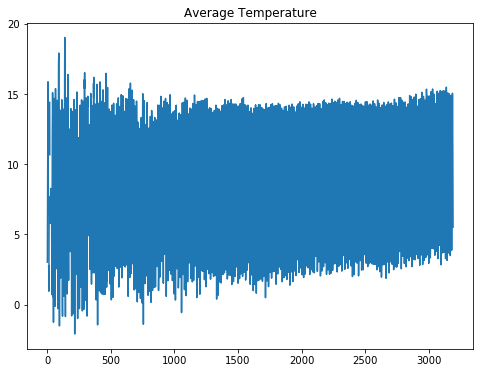

In [6]:
temp.LandAverageTemperature.plot(figsize=(8,6))                  #plotting first column only
plt.title('Average Temperature')

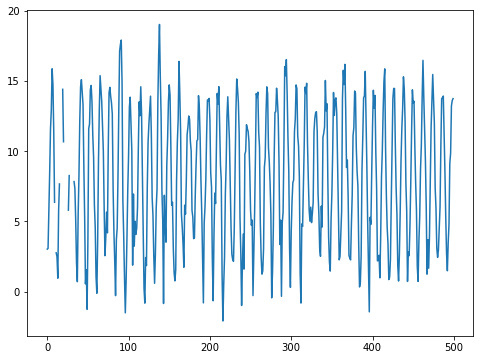

In [7]:
temp.LandAverageTemperature[:500].plot(figsize=(8,6))                #above plot doesn't look good and hard to understand 
                                                                    # so, plotting first 500 values to understand the graph and trends

In [8]:
df = temp.iloc[:,:2]                                                     #taking first two columns for predicting average temperature
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [9]:
from datetime import datetime                             #importing datetime to change the data type of first column

In [10]:
df['dt'] = pd.to_datetime(df.dt)                             #changing the datatype of first column

In [11]:
df.info()                           #information about dataset. Now datatype of first column is datetime. Earlier it was object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dt                      3192 non-null   datetime64[ns]
 1   LandAverageTemperature  3180 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.0 KB


In [12]:
df.fillna(df.LandAverageTemperature.mean(),inplace=True)               #filling null values with mean 

In [13]:
df.isnull().sum()                        #checking null value. Now, there is no null value in dataset

dt                        0
LandAverageTemperature    0
dtype: int64

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf          #importing plot_acf, plot_pacf to plot auto corrlation and partial auto correlation of time series with its previous lags

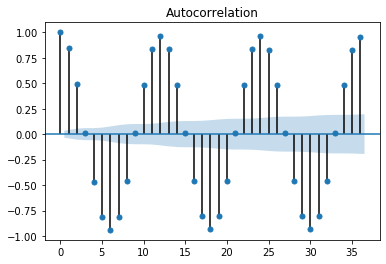

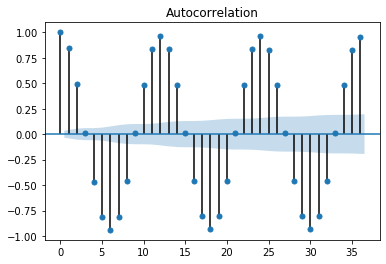

In [15]:
plot_acf(df.LandAverageTemperature)                          #auto correlation of time series with its previous lags

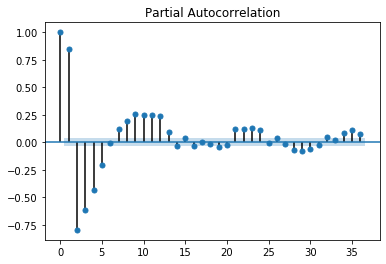

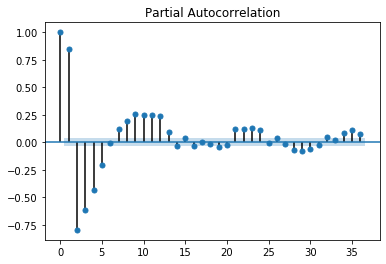

In [16]:
plot_pacf(df.LandAverageTemperature)                             #Partial auto correlation of time series with its previous lags

In [17]:
from matplotlib.pylab import rcParams

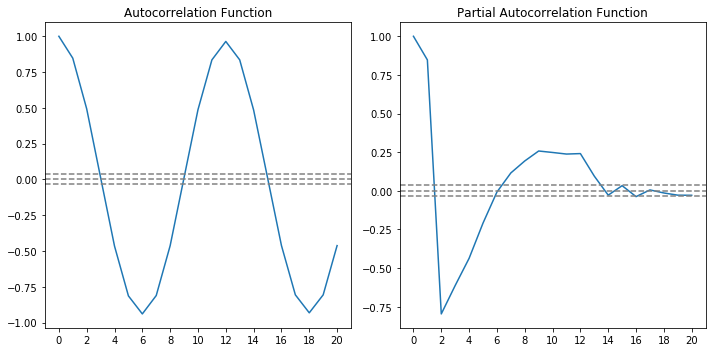

In [18]:
#ACF & PACF plots( #Performing same things with different method)

from statsmodels.tsa.stattools import acf, pacf

lag_acf  =  acf(df.LandAverageTemperature, nlags = 20)
lag_pacf  =  pacf(df.LandAverageTemperature, nlags = 20, method = 'ols')
rcParams['figure.figsize']  =  10, 5
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df.LandAverageTemperature)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df.LandAverageTemperature)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(df.LandAverageTemperature)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(df.LandAverageTemperature)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

In [19]:
from statsmodels.tsa.stattools import adfuller                                 #importing ADFuller to check stationarity of time series
dftest  =  adfuller(df.LandAverageTemperature, autolag = 'AIC')
dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [20]:
dfoutput                                                     #p values is less than 0.05 . It means series is stationary 

Test Statistic                   -4.036040
p-value                           0.001233
#Lags Used                       29.000000
Number of Observations Used    3162.000000
dtype: float64

In [21]:
train, test = df[:-500],df[-500:]                        #splitting dataset into train and test data

In [22]:
print('Length of training dataset',len(train))                       #length of train dataset
print('Length of test dataset',len(test))                            #length of test dataset

Length of training dataset 2692
Length of test dataset 500


In [23]:
from statsmodels.tsa.ar_model import AR                   #importing AR model(Auto Regression)
model = AR(train.LandAverageTemperature)
model_fit = model.fit()                                   #fitting the AR model
print('Lag: %s' % model_fit.k_ar)                         #checking lags of model
print('Coefficients: %s' % model_fit.params)              #checking cofficient(intercept)

Lag: 27
Coefficients: const                         1.580833
L1.LandAverageTemperature     0.401678
L2.LandAverageTemperature     0.086878
L3.LandAverageTemperature    -0.010077
L4.LandAverageTemperature    -0.108119
L5.LandAverageTemperature    -0.074905
L6.LandAverageTemperature    -0.052765
L7.LandAverageTemperature     0.023357
L8.LandAverageTemperature    -0.003909
L9.LandAverageTemperature     0.036403
L10.LandAverageTemperature    0.047029
L11.LandAverageTemperature    0.040749
L12.LandAverageTemperature    0.167234
L13.LandAverageTemperature    0.059034
L14.LandAverageTemperature   -0.036144
L15.LandAverageTemperature    0.019237
L16.LandAverageTemperature   -0.027186
L17.LandAverageTemperature    0.033493
L18.LandAverageTemperature    0.028009
L19.LandAverageTemperature   -0.022513
L20.LandAverageTemperature   -0.074454
L21.LandAverageTemperature    0.052485
L22.LandAverageTemperature    0.044305
L23.LandAverageTemperature    0.081247
L24.LandAverageTemperature    0.085010
L25

In [24]:
# making predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions.head()

2692    11.347685
2693    13.644263
2694    14.639841
2695    13.972289
2696    11.893467
dtype: float64

Text(0.5, 1.0, 'AR Model')

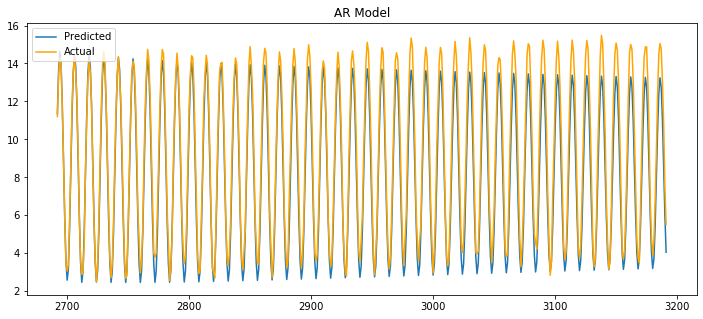

In [25]:
plt.figure(figsize=(12,5))                                                          #setting size of plot
predictions.plot(label='Predicted')                                                 #plotting predicted values
test.LandAverageTemperature.plot(label='Actual',color='orange')                       #plotting actual values
plt.legend()
plt.title('AR Model')

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error                    #importing performance metrics

In [27]:
print('MAE is :',mean_absolute_error(test.LandAverageTemperature,predictions))              #mean absolute error
print('MSE is :',mean_squared_error(test.LandAverageTemperature,predictions))               #mean squared error
print('RMSE is :',np.sqrt(mean_squared_error(test.LandAverageTemperature,predictions)))     #root mean squared error

MAE is : 0.9322910698862985
MSE is : 1.1812211462716242
RMSE is : 1.0868399819070074


In [28]:
from statsmodels.tsa.arima_model import ARIMA,ARMA                         #importing ARMA and ARIMA models

In [29]:
arma = ARMA(train.LandAverageTemperature,order=(2,2))                 #calling ARMA model
                                                                      #ARMA model takes two parameters i.e. p and q . Here p&q =2

In [30]:
arma_model = arma.fit()                                          #fitting ARMA model

In [31]:
print('Lag: %s' % arma_model.k_ar)
print('Coefficients: %s' % arma_model.params)

Lag: 2
Coefficients: const                           8.225260
ar.L1.LandAverageTemperature    1.730580
ar.L2.LandAverageTemperature   -0.998322
ma.L1.LandAverageTemperature   -1.465434
ma.L2.LandAverageTemperature    0.766298
dtype: float64


In [32]:
# making predictions using ARMA
arma_predictions = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [33]:
arma_predictions.head(5)                            #top 5 predicted values

2692    10.827699
2693    13.124821
2694    14.106268
2695    13.511474
2696    11.502333
dtype: float64

Text(0.5, 1.0, 'ARMA Model')

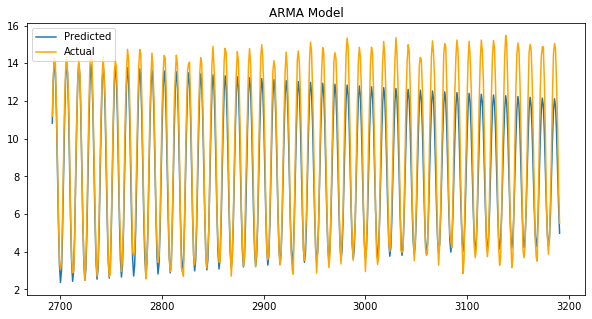

In [34]:
arma_predictions.plot(label='Predicted')                           #plotting predicted values
test.LandAverageTemperature.plot(label='Actual',color='orange')     #plotting actual values 
plt.legend()
plt.title('ARMA Model')

In [35]:
print('MAE is :',mean_absolute_error(test.LandAverageTemperature,arma_predictions))
print('MSE is :',mean_squared_error(test.LandAverageTemperature,arma_predictions))
print('RMSE is :',np.sqrt(mean_squared_error(test.LandAverageTemperature,arma_predictions)))

MAE is : 1.0625692459478728
MSE is : 1.7964439383938888
RMSE is : 1.3403148653931616


In [36]:
arima = ARIMA(train.LandAverageTemperature,order=(2,1,3))
arima_model = arima.fit()

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
print('Lag: %s' % arima_model.k_ar)
print('Coefficients: %s' % arima_model.params)

Lag: 2
Coefficients: const                             0.000127
ar.L1.D.LandAverageTemperature    1.731013
ar.L2.D.LandAverageTemperature   -0.998797
ma.L1.D.LandAverageTemperature   -2.507433
ma.L2.D.LandAverageTemperature    2.300571
ma.L3.D.LandAverageTemperature   -0.774547
dtype: float64


In [38]:
# make predictions
arima_predictions = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

Text(0.5, 1.0, 'ARMA Model')

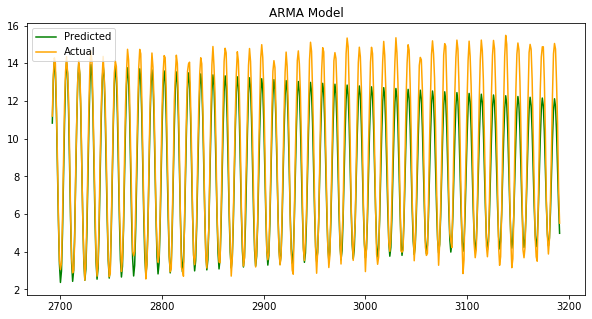

In [39]:
arima_predictions.plot(label='Predicted',color = 'green')
test.LandAverageTemperature.plot(label='Actual',color='orange')
plt.legend()
plt.title('ARMA Model')

In [40]:
print('MAE is :',mean_absolute_error(test.LandAverageTemperature,arima_predictions))
print('MSE is :',mean_squared_error(test.LandAverageTemperature,arima_predictions))
print('RMSE is :',np.sqrt(mean_squared_error(test.LandAverageTemperature,arima_predictions)))

MAE is : 1.0625692459478728
MSE is : 1.7964439383938888
RMSE is : 1.3403148653931616


## Exponential Smoothing

In [41]:
df1 = df.set_index('dt',inplace=True)                                               #setting date column as an index

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose             #importing seasonal decompose to check the component of a time series

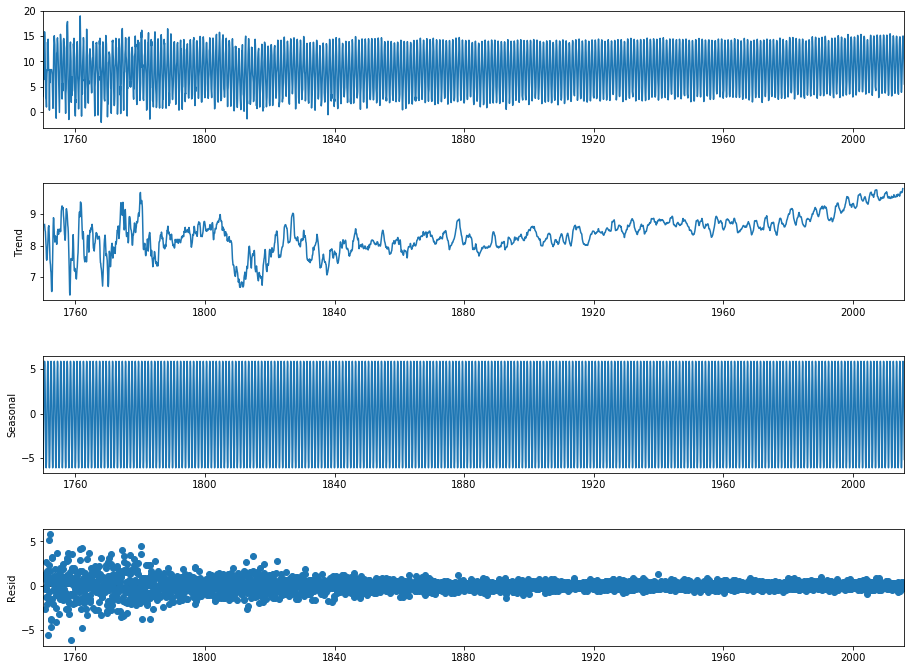

In [43]:
decomp = seasonal_decompose(df)                     #checking all the components of a time series 
fig = decomp.plot()
fig.set_size_inches(13, 10)
plt.show()


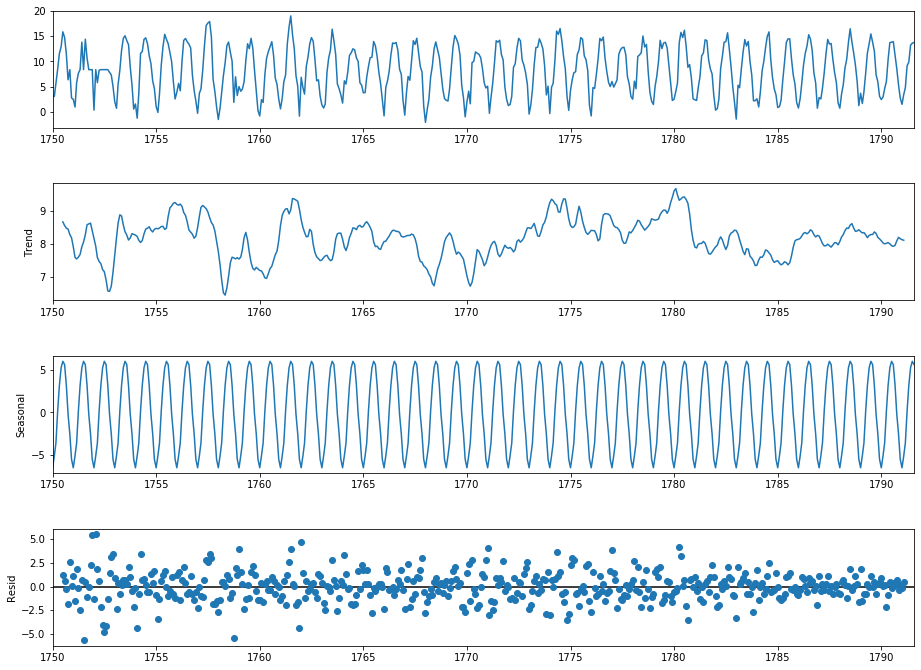

In [44]:
decomp = seasonal_decompose(df[:500])                          #checking first 500 points for better understanding 
fig = decomp.plot()
fig.set_size_inches(13, 10)
plt.show()

In [45]:
decomp.seasonal[:30]  
#here seasonality is yearly/12months because every 12 months or year value is repeating
# For example:- Value at 1750-01-01, 1751-01-01 is same

dt
1750-01-01   -6.522811
1750-02-01   -5.100429
1750-03-01   -3.606594
1750-04-01    0.182767
1750-05-01    3.174597
1750-06-01    5.271942
1750-07-01    6.026610
1750-08-01    5.645330
1750-09-01    3.164278
1750-10-01   -0.188544
1750-11-01   -2.530627
1750-12-01   -5.516519
1751-01-01   -6.522811
1751-02-01   -5.100429
1751-03-01   -3.606594
1751-04-01    0.182767
1751-05-01    3.174597
1751-06-01    5.271942
1751-07-01    6.026610
1751-08-01    5.645330
1751-09-01    3.164278
1751-10-01   -0.188544
1751-11-01   -2.530627
1751-12-01   -5.516519
1752-01-01   -6.522811
1752-02-01   -5.100429
1752-03-01   -3.606594
1752-04-01    0.182767
1752-05-01    3.174597
1752-06-01    5.271942
Name: seasonal, dtype: float64

In [46]:
new_train, new_test = df[:-500],df[-500:]                              #splitting into training dataset and test dataset

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing            #importing Exp. Smoothing 

In [48]:
Exp = ExponentialSmoothing(new_train,trend='add',seasonal='add',seasonal_periods=12)        #calling Exp Smoothing

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [49]:
Exp_fit = Exp.fit(optimized=True)                             #fitting Exp smoothing model

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [50]:
Exp_prediction = Exp_fit.predict(start=len(new_train),end=len(train)+len(test)-1)                       #making predictions

Text(0.5, 1.0, 'Exp Model')

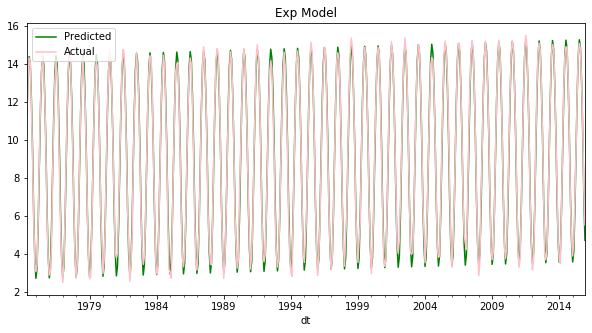

In [51]:
Exp_prediction.plot(label='Predicted',color='green')                      #plotting predicted values
new_test.LandAverageTemperature.plot(label='Actual',color='pink')       #plotting actual values
plt.legend()
plt.title('Exp Model')                                             #title name

In [52]:
print('MAE is :',mean_absolute_error(new_test.LandAverageTemperature,Exp_prediction))
print('MSE is :',mean_squared_error(new_test.LandAverageTemperature,Exp_prediction))
print('RMSE is :',np.sqrt(mean_squared_error(new_test.LandAverageTemperature,Exp_prediction)))

MAE is : 0.25662568948048586
MSE is : 0.10762422541067372
RMSE is : 0.32806131349288004


## SARIMA

In [53]:
from pmdarima import auto_arima                                       #importing auto arima

In [54]:
# Fit auto_arima function to dataset 
stepwise_fit = auto_arima(df.LandAverageTemperature, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=7633.698, BIC=7664.021, Time=25.119 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=9719.291, BIC=9731.420, Time=0.446 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=8638.314, BIC=8662.572, Time=6.323 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=7777.688, BIC=7801.946, Time=13.061 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=9717.338, BIC=9723.403, Time=0.371 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=9427.610, BIC=9451.868, Time=2.931 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=7622.021, BIC=7658.409, Time=34.994 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one invers

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3192
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -3805.011
Date:                            Sat, 02 Jan 2021   AIC                           7622.021
Time:                                    10:40:17   BIC                           7658.409
Sample:                                         0   HQIC                          7635.071
                                           - 3192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0019      0.001      2.664      0.008       0.001       0.003
ar.L1          0.5761      0.021     27.386      0.000       0.535       0.617
ma.L1         -0.2430      0.024    -10.059      0.000      -0.290      -0.196
ar.S.L12       0.0693      0.010      6.836      0.000       0.049       0.089
ma.S.L12      -0.9601      0.007   -136.627      0.000      -0.974      -0.946
sigma2         0.6351      0.008     83.345      0.000       0.620       0.650
===================================================================================
Ljung-Box (Q):                      165.78   Jarque-Bera (JB):              9613.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
model = SARIMAX(new_train.LandAverageTemperature,  
                order = (1, 0, 1),  
                seasonal_order =(1, 1, 1, 12)) 

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [57]:
result = model.fit()

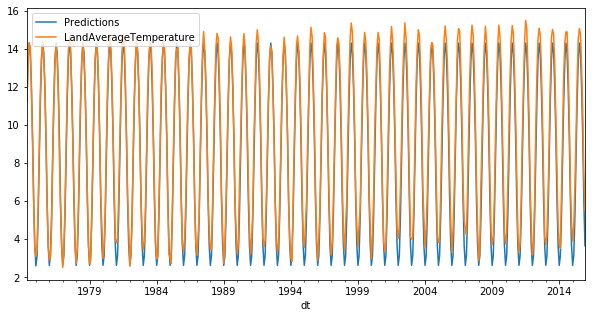

In [58]:
start = len(new_train) 
end = len(new_train) + len(new_test) - 1
  
# Predictions against the test set 
sarima_predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
sarima_predictions.plot(legend = True) 
new_test.LandAverageTemperature.plot(legend = True) 

In [59]:
print('MAE is :',mean_absolute_error(new_test.LandAverageTemperature,sarima_predictions))
print('MSE is :',mean_squared_error(new_test.LandAverageTemperature,sarima_predictions))
print('RMSE is :',np.sqrt(mean_squared_error(new_test.LandAverageTemperature,sarima_predictions)))

MAE is : 0.6369781052404667
MSE is : 0.5689694693826839
RMSE is : 0.7543006491994315


### Merging all the predicted values

In [79]:
new_test['AR_Prediction'] = predictions.values
new_test['ARMA_Predictions']  =arma_predictions.values
new_test['ARIMA_Predictions'] = arima_predictions.values
new_test['SARIMA_Predictions'] =sarima_predictions.values
new_test['Exp. Smoothing_Predictions'] = Exp_prediction.values

In [80]:
new_test

,LandAverageTemperature,AR_Prediction,ARMA_Predictions,ARIMA_Predictions,SARIMA_Predictions,Exp. Smoothing_Predictions
dt,,,,,,
1974-05-01,11.198,11.347685,10.827699,10.827699,11.240468,11.360992
1974-06-01,13.382,13.644263,13.124821,13.124821,13.404799,13.520249
1974-07-01,14.288,14.639841,14.106268,14.106268,14.296084,14.367806
1974-08-01,14.016,13.972289,13.511474,13.511474,13.804501,13.919000
1974-09-01,11.744,11.893467,11.502333,11.502333,12.011342,12.118821
...,...,...,...,...,...,...
2015-08-01,14.755,12.736296,11.707729,11.707729,13.801549,14.803062
2015-09-01,12.999,11.019508,10.365592,10.365592,12.003674,13.002883
2015-10-01,10.801,8.556095,8.452650,8.452650,9.394971,10.406395


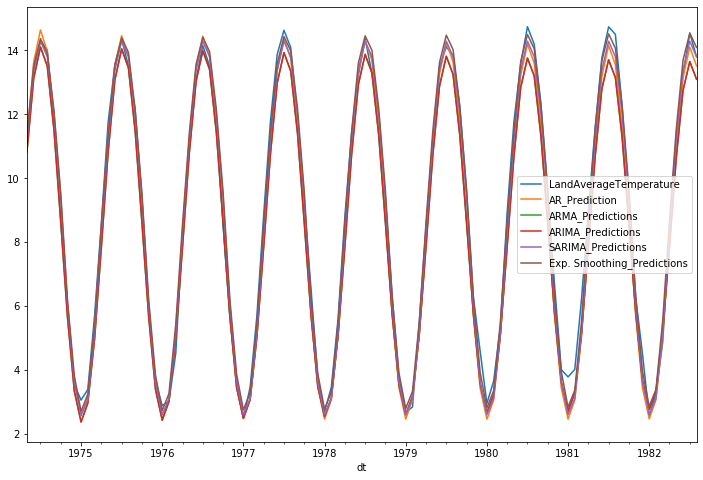

In [85]:
new_test[:100].plot(figsize=(12,8))

## Key Points

1. Exponential Smoothing was performing best out of all the models
2. Time series needs to be stationary for models like AR, ARMA, ARIMA.
3. Instead of ARIMA we can also use auto arima .It will automatically find the value of p,d,q
4. There are some other models also for time series like Fb Prophet, RNN-LSTM